# 使用MCMC中的Metropolis-Hasting方法进行随机抽样

<font face="楷体" color=4010D0>
## 一.马尔科夫链的一般结构
### 马尔科夫链是一条状态链，可表示为$\{\pi(1),\pi(2)\cdots \pi(i),\pi(j)\cdots\}$，结合概率论的内容，可将某概率密度函数$F$表示为如下形式：$$\lim_{n\to+\infty}\{\cdots ，F(-\frac{2}{n}),F(-\frac{1}{n}),F(0),F(\frac{1}{n}),F(\frac{2}{n}),\cdots\}$$且满足$$\int_{-\infty}^{+\infty} F(x)dx=1$$
### 状态链的转移通过转移概率矩阵$P=\{p_{ij}\}$实现，$P$的结构如下:
### $$
        \left (\begin{matrix}
        p_{11} & p_{12} & \cdots &p_{1j}& \cdots  \\
        p_{21}  & p_{22} & \cdots &p_{2j}& \cdots \\
        \vdots & \vdots & \ddots & \vdots & \cdots \\
        p_{i1} & p_{i2} & \cdots & p_{ij} & \cdots \\
        \vdots & \vdots & \vdots & \vdots & \ddots \\
        \end{matrix} \right)
  $$
### 其中每行元素满足和式$$\sum_{j=1}^{\infty} p_{ij}=1$$
### 转移概率矩阵若不为n次幂等矩阵，则称具有该转移概率矩阵的马尔科夫过程具有遍历性，具有遍历性的马尔科夫过程，满足性质$$\lim_{n\to+\infty}p_{ij}^n=\bar\pi(j)$$可知$P^n$中元素只与列有关，格式如下：
### $$ P^n=
        \left (\begin{matrix}
        \bar\pi(1) & \bar\pi(2) & \cdots &\bar\pi(j)& \cdots  \\
        \bar\pi(1)  & \bar\pi(2) & \cdots &\bar\pi(j)& \cdots \\
        \vdots & \vdots & \ddots & \vdots & \cdots \\
       \bar\pi(1) & \bar\pi(2) & \cdots & \bar\pi(j) & \cdots \\
        \vdots & \vdots & \vdots & \vdots & \ddots \\
        \end{matrix} \right)$$
### 证明：由n次幂矩阵的计算方法，作矩阵分解得$P=A\Lambda A^{-1}$,其中$\Lambda$为对角矩阵，形式如下：
### $$ \Lambda=
        \left (\begin{matrix}
        \lambda_1 & 0 & \cdots& 0& \cdots  \\
        0  & \lambda_2 & \cdots & 0 & \cdots \\
        \vdots & \vdots & \ddots & \vdots & \cdots \\
       0 & 0 & \cdots & \lambda_j & \cdots \\
        \vdots & \vdots & \vdots & \vdots & \ddots \\
        \end{matrix} \right)$$
### 根据该分解易知$P^n=A\Lambda^nA^{-1}$
### $$P=A\Lambda A^{-1}\Leftrightarrow 
     PA=A\Lambda
     $$
### $A$可以写作列向量组合$\begin{bmatrix} A^1 & A^2 & \cdots & A^j & \cdots\\ \end{bmatrix}$
### 写成方程组形式则为$$\begin{split}  PA^i=\lambda_iA^i \quad (i=1,2,\cdots,j\cdots)\\
                     (P-\lambda_i I)A^i=0 \quad (i=1,2,\cdots,j\cdots)\end{split}$$
### 则将求解矩阵$A$的问题转化为求解系数矩阵为$P-\lambda_i I$的齐次线性方程组
### 转移矩阵若为n次幂等矩阵，即满足：$$\Lambda^n =\Lambda \Leftrightarrow \lambda_i^n =\lambda_i\quad (i=1,2,\cdots,j\cdots)\\
\Updownarrow\\
\lambda_i\in\{0\}\cup\{\cos(\frac{2k\pi}{n-1} )+i\sin(\frac{2k\pi}{n-1} )|k=1,2,\cdots,n-1\}\quad (i=1,2,\cdots,j\cdots)$$
### (对于此处特征值的代数重数大于特征向量的代数重数的情况，引入Jordan标准型矩阵)
### 此时该马尔科夫过程不具有遍历性

<font face="楷体" color=Green>
## 二.稳定状态链的基本概念
### 由马尔科夫过程具有极限状态，可知马尔科夫链的稳态条件满足：
### $$ 
         \left (\begin{matrix}
        \bar\pi(1)\\ \bar\pi(2) \\ \vdots \\ \bar\pi(j)\\ \vdots  \\
        \end{matrix} \right)^{-1}
        \left (\begin{matrix}
        p_{11} & p_{12} & \cdots &p_{1j}& \cdots  \\
        p_{21}  & p_{22} & \cdots &p_{2j}& \cdots \\
        \vdots & \vdots & \ddots & \vdots & \cdots \\
        p_{i1} & p_{i2} & \cdots & p_{ij} & \cdots \\
        \vdots & \vdots & \vdots & \vdots & \ddots \\
        \end{matrix} \right)=
         \left (\begin{matrix}
        \bar\pi(1)\\ \bar\pi(2) \\ \vdots \\ \bar\pi(j)\\ \vdots  \\
        \end{matrix} \right)^{-1}
        $$
### 即满足：
### $$\bar\pi(j)=\sum_{i=1}^{\infty} \bar\pi(i)p_{ij}$$
### 补充以下条件，联立知：
### $$
\begin{cases}
\bar\pi(j)=\sum_{i=1}^{\infty} \bar\pi(i)p_{ij}\\
\quad\\
\sum_{i=1}^{\infty} p_{ji}=1
\end{cases}
\Leftrightarrow
\sum_{i=1}^{\infty} \bar\pi(j)p_{ji}=\sum_{i=1}^{\infty} \bar\pi(i)p_{ij}$$
### 马尔可夫链的细致平稳(detailed balance)是状态链达到稳定状态的充分不必要条件：
### $$\bar\pi(i)p_{ij}=\bar\pi(j)p_{ji}
\Rightarrow
\sum_{i=1}^{\infty} \bar\pi(j)p_{ji}=\sum_{i=1}^{\infty} \bar\pi(i)p_{ij}
$$
### 达到细致平稳时，马氏链由状态$\bar\pi(i)$转移到状态$\bar\pi(j)$的概率为$p_{ij}$，反之亦然，链的稳态条件即：两状态转移概率相等。

## 三.Metropolis Algorithm and Exampers

In [5]:
from display import Latex
from sympy import *
import numpy
theta=1
x,y=Symbol('x'),Symbol('y')
print(Latex(ln(x+sqrt(1+x**2)).series(x,0,30),mode='equation',itex=True))

ModuleNotFoundError: No module named 'display'

$$x - \frac{x^{3}}{6} + \frac{3 x^{5}}{40} - \frac{5 x^{7}}{112} + \frac{35 x^{9}}{1152} - \frac{63 x^{11}}{2816} + \frac{231 x^{13}}{13312} - \frac{143 x^{15}}{10240} + \frac{6435 x^{17}}{557056} - \frac{12155 x^{19}}{1245184} + \frac{46189 x^{21}}{5505024} - \frac{88179 x^{23}}{12058624} + \frac{676039 x^{25}}{104857600} - \frac{1300075 x^{27}}{226492416} + \frac{5014575 x^{29}}{973078528} + \mathcal{O}\left(x^{30}\right)$$

$$\sin{\left (y^{2} \right )} + \left(x - y\right)^{2} \left(- 2 y^{2} \sin{\left (y^{2} \right )} + \cos{\left (y^{2} \right )}\right) + \left(x - y\right)^{3} \left(- \frac{4 y^{3}}{3} \cos{\left (y^{2} \right )} - 2 y \sin{\left (y^{2} \right )}\right) + \left(x - y\right)^{4} \left(\frac{2 y^{4}}{3} \sin{\left (y^{2} \right )} - 2 y^{2} \cos{\left (y^{2} \right )} - \frac{1}{2} \sin{\left (y^{2} \right )}\right) + \left(x - y\right)^{5} \left(\frac{4 y^{5}}{15} \cos{\left (y^{2} \right )} + \frac{4 y^{3}}{3} \sin{\left (y^{2} \right )} - y \cos{\left (y^{2} \right )}\right) + \left(x - y\right)^{6} \left(- \frac{4 y^{6}}{45} \sin{\left (y^{2} \right )} + \frac{2 y^{4}}{3} \cos{\left (y^{2} \right )} + y^{2} \sin{\left (y^{2} \right )} - \frac{1}{6} \cos{\left (y^{2} \right )}\right) + \left(x - y\right)^{7} \left(- \frac{8 y^{7}}{315} \cos{\left (y^{2} \right )} - \frac{4 y^{5}}{15} \sin{\left (y^{2} \right )} + \frac{2 y^{3}}{3} \cos{\left (y^{2} \right )} + \frac{y}{3} \sin{\left (y^{2} \right )}\right) + \left(x - y\right)^{8} \left(\frac{2 y^{8}}{315} \sin{\left (y^{2} \right )} - \frac{4 y^{6}}{45} \cos{\left (y^{2} \right )} - \frac{y^{4}}{3} \sin{\left (y^{2} \right )} + \frac{y^{2}}{3} \cos{\left (y^{2} \right )} + \frac{1}{24} \sin{\left (y^{2} \right )}\right) + \left(x - y\right)^{9} \left(\frac{4 y^{9}}{2835} \cos{\left (y^{2} \right )} + \frac{8 y^{7}}{315} \sin{\left (y^{2} \right )} - \frac{2 y^{5}}{15} \cos{\left (y^{2} \right )} - \frac{2 y^{3}}{9} \sin{\left (y^{2} \right )} + \frac{y}{12} \cos{\left (y^{2} \right )}\right) + \left(x - y\right)^{10} \left(- \frac{4 y^{10}}{14175} \sin{\left (y^{2} \right )} + \frac{2 y^{8}}{315} \cos{\left (y^{2} \right )} + \frac{2 y^{6}}{45} \sin{\left (y^{2} \right )} - \frac{y^{4}}{9} \cos{\left (y^{2} \right )} - \frac{y^{2}}{12} \sin{\left (y^{2} \right )} + \frac{1}{120} \cos{\left (y^{2} \right )}\right) + \left(x - y\right)^{11} \left(- \frac{8 y^{11}}{155925} \cos{\left (y^{2} \right )} - \frac{4 y^{9}}{2835} \sin{\left (y^{2} \right )} + \frac{4 y^{7}}{315} \cos{\left (y^{2} \right )} + \frac{2 y^{5}}{45} \sin{\left (y^{2} \right )} - \frac{y^{3}}{18} \cos{\left (y^{2} \right )} - \frac{y}{60} \sin{\left (y^{2} \right )}\right) + \left(x - y\right)^{12} \left(\frac{4 y^{12}}{467775} \sin{\left (y^{2} \right )} - \frac{4 y^{10}}{14175} \cos{\left (y^{2} \right )} - \frac{y^{8}}{315} \sin{\left (y^{2} \right )} + \frac{2 y^{6}}{135} \cos{\left (y^{2} \right )} + \frac{y^{4}}{36} \sin{\left (y^{2} \right )} - \frac{y^{2}}{60} \cos{\left (y^{2} \right )} - \frac{1}{720} \sin{\left (y^{2} \right )}\right) + \left(x - y\right)^{13} \left(\frac{8 y^{13}}{6081075} \cos{\left (y^{2} \right )} + \frac{8 y^{11}}{155925} \sin{\left (y^{2} \right )} - \frac{2 y^{9}}{2835} \cos{\left (y^{2} \right )} - \frac{4 y^{7}}{945} \sin{\left (y^{2} \right )} + \frac{y^{5}}{90} \cos{\left (y^{2} \right )} + \frac{y^{3}}{90} \sin{\left (y^{2} \right )} - \frac{y}{360} \cos{\left (y^{2} \right )}\right) + \left(x - y\right)^{14} \left(- \frac{8 y^{14}}{42567525} \sin{\left (y^{2} \right )} + \frac{4 y^{12}}{467775} \cos{\left (y^{2} \right )} + \frac{2 y^{10}}{14175} \sin{\left (y^{2} \right )} - \frac{y^{8}}{945} \cos{\left (y^{2} \right )} - \frac{y^{6}}{270} \sin{\left (y^{2} \right )} + \frac{y^{4}}{180} \cos{\left (y^{2} \right )} + \frac{y^{2}}{360} \sin{\left (y^{2} \right )} - \frac{1}{5040} \cos{\left (y^{2} \right )}\right) + \left(x - y\right)^{15} \left(- \frac{16 y^{15}}{638512875} \cos{\left (y^{2} \right )} - \frac{8 y^{13}}{6081075} \sin{\left (y^{2} \right )} + \frac{4 y^{11}}{155925} \cos{\left (y^{2} \right )} + \frac{2 y^{9}}{8505} \sin{\left (y^{2} \right )} - \frac{y^{7}}{945} \cos{\left (y^{2} \right )} - \frac{y^{5}}{450} \sin{\left (y^{2} \right )} + \frac{y^{3}}{540} \cos{\left (y^{2} \right )} + \frac{y}{2520} \sin{\left (y^{2} \right )}\right) + \left(x - y\right)^{16} \left(\frac{2 y^{16}}{638512875} \sin{\left (y^{2} \right )} - \frac{8 y^{14}}{42567525} \cos{\left (y^{2} \right )} - \frac{2 y^{12}}{467775} \sin{\left (y^{2} \right )} + \frac{2 y^{10}}{42525} \cos{\left (y^{2} \right )} + \frac{y^{8}}{3780} \sin{\left (y^{2} \right )} - \frac{y^{6}}{1350} \cos{\left (y^{2} \right )} - \frac{y^{4}}{1080} \sin{\left (y^{2} \right )} + \frac{y^{2}}{2520} \cos{\left (y^{2} \right )} + \frac{1}{40320} \sin{\left (y^{2} \right )}\right) + \left(x - y\right)^{17} \left(\frac{4 y^{17}}{10854718875} \cos{\left (y^{2} \right )} + \frac{16 y^{15}}{638512875} \sin{\left (y^{2} \right )} - \frac{4 y^{13}}{6081075} \cos{\left (y^{2} \right )} - \frac{4 y^{11}}{467775} \sin{\left (y^{2} \right )} + \frac{y^{9}}{17010} \cos{\left (y^{2} \right )} + \frac{y^{7}}{4725} \sin{\left (y^{2} \right )} - \frac{y^{5}}{2700} \cos{\left (y^{2} \right )} - \frac{y^{3}}{3780} \sin{\left (y^{2} \right )} + \frac{y}{20160} \cos{\left (y^{2} \right )}\right) + \left(x - y\right)^{18} \left(- \frac{4 y^{18}}{97692469875} \sin{\left (y^{2} \right )} + \frac{2 y^{16}}{638512875} \cos{\left (y^{2} \right )} + \frac{4 y^{14}}{42567525} \sin{\left (y^{2} \right )} - \frac{2 y^{12}}{1403325} \cos{\left (y^{2} \right )} - \frac{y^{10}}{85050} \sin{\left (y^{2} \right )} + \frac{y^{8}}{18900} \cos{\left (y^{2} \right )} + \frac{y^{6}}{8100} \sin{\left (y^{2} \right )} - \frac{y^{4}}{7560} \cos{\left (y^{2} \right )} - \frac{y^{2}}{20160} \sin{\left (y^{2} \right )} + \frac{1}{362880} \cos{\left (y^{2} \right )}\right) + \left(x - y\right)^{19} \left(- \frac{8 y^{19}}{1856156927625} \cos{\left (y^{2} \right )} - \frac{4 y^{17}}{10854718875} \sin{\left (y^{2} \right )} + \frac{8 y^{15}}{638512875} \cos{\left (y^{2} \right )} + \frac{4 y^{13}}{18243225} \sin{\left (y^{2} \right )} - \frac{y^{11}}{467775} \cos{\left (y^{2} \right )} - \frac{y^{9}}{85050} \sin{\left (y^{2} \right )} + \frac{y^{7}}{28350} \cos{\left (y^{2} \right )} + \frac{y^{5}}{18900} \sin{\left (y^{2} \right )} - \frac{y^{3}}{30240} \cos{\left (y^{2} \right )} - \frac{y}{181440} \sin{\left (y^{2} \right )}\right) + 2 y \left(x - y\right) \cos{\left (y^{2} \right )} + \mathcal{O}\left(\left(x - y\right)^{20}; x\rightarrow y\right)$$

(-1.0998615404412626,
 1.0998615404412626,
 -0.049987413559579634,
 1.0497356847511723)

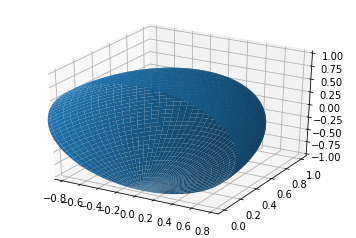

In [6]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data
u = np.linspace(0,np.pi, 100)
v = np.linspace(0, np.pi, 100)
x =np.outer(np.cos(u), np.sin(v))
y =np.outer(np.sin(u), np.sin(v))
z =np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
ax.plot_surface(x, y, z)
plt.axis('equal')

$$\sin{\left (1 \right )} + \left(x - 1\right) \cos{\left (1 \right )} + \left(x - 1\right)^{2} \left(- \frac{1}{2} \sin{\left (1 \right )} + \cos{\left (1 \right )}\right) + \left(x - 1\right)^{3} \left(- \sin{\left (1 \right )} + \frac{1}{3} \cos{\left (1 \right )}\right) + \left(x - 1\right)^{4} \left(- \frac{23}{24} \sin{\left (1 \right )} - \frac{1}{6} \cos{\left (1 \right )}\right) + \left(x - 1\right)^{5} \left(- \frac{2}{3} \sin{\left (1 \right )} - \frac{79}{120} \cos{\left (1 \right )}\right) + \mathcal{O}\left(\left(x - 1\right)^{6}; x\rightarrow 1\right)$$

In [4]:
import pandas as pd
pd.read_csv('123.csv')

,电阻,铜电阻（惠斯通电桥）,Unnamed: 2,Unnamed: 3,铜电阻（卧式电桥）,Unnamed: 5,Unnamed: 6,热敏电阻（立式电桥）,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,电压,平衡桥US=5.0V,NaN,NaN,非平衡桥电压US=1.3V,NaN,NaN,非平衡桥电压US=1.3V,NaN,NaN,NaN,NaN
1,预置,R1=100Ω R2=1000Ω \nR3≈500Ω,NaN,NaN,R2（a）=R3（b）=50Ω\nR1（c）≈50Ω,NaN,NaN,R1（a）=R2（b）=100Ω\nR1（c）≈2～4kΩ,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,次数,t/℃,R3/Ω,Rx/Ω,t/℃,U0/mV,Rx/Ω,t/℃,U0/mV,Rx/Ω,1000/T,lnRx
4,1,24,552.8,55.28,30,0,56.37,30,0,2584,3.299,7.857
5,2,27,559.7,55.97,33,3.6,56.99,33,-5.4,2314.78,3.266,7.747
6,3,30,565.7,56.57,36,7.2,57.62,36,-10.8,2094.64,3.235,7.647
7,4,33,571.9,57.19,39,10.8,58.24,39,-16.9,1889.74,3.204,7.544
8,5,36,578.4,57.84,42,14.4,58.87,42,-23.4,1709.7,3.173,7.444
9,6,39,585.3,58.53,45,17.9,59.47,45,-30.4,1549.01,3.143,7.345
